In [1]:
import pandas as pd
import itertools
import matplotlib.pyplot as pl
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
path = 'result/'
res_adult = pd.read_csv(path + 'resultado_adult.csv')
res_adult.drop('Unnamed: 0', axis=1, inplace=True)
res_compas = pd.read_csv(path + 'resultado_compas.csv')
res_compas.drop('Unnamed: 0', axis=1, inplace=True)
res_german = pd.read_csv(path + 'resultado_german.csv')
res_german.drop('Unnamed: 0', axis=1, inplace=True)
res_default = pd.read_csv(path + 'resultado_default.csv')
res_default.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
res_completo = res_adult.append(res_compas).append(res_german).append(res_default)
res_completo

,name_exp,feat_imp,shap_rank,mean_unpriv,mean_priv,priv_greater_unpriv,dataset,acc_test,disp_impact_bin,mean_difference,disp_impact_clf,avg_odds,equal_opport,false_discovery_rate,entropy_index,consistency
0,rf_orig,0.001268,24,-0.004091,0.000768,1,adult,0.858942,0.641228,-0.065392,0.641228,0.002571,0.025319,0.006061,0.079016,0.950128
1,rf_transf,0.001072,26,0.003859,-0.000568,0,adult,0.860682,0.693618,-0.055291,0.693618,0.019152,0.050946,0.034576,0.078028,0.946607
2,gbm_orig,0.019709,13,-0.064841,0.011608,1,adult,0.869280,0.645262,-0.071476,0.645262,-0.011973,-0.010232,0.057990,0.071511,0.932480
3,gbm_transf,0.025514,13,0.087311,-0.014778,0,adult,0.868461,0.730850,-0.053229,0.730850,0.015812,0.032371,0.099961,0.072062,0.933402
4,lr_orig,0.085184,17,-0.291550,0.049331,1,adult,0.852083,0.574945,-0.091517,0.574945,-0.041442,-0.048858,0.018721,0.079902,0.939953
5,lr_transf,0.051597,28,0.175957,-0.029804,0,adult,0.851162,0.826122,-0.035661,0.826122,0.057766,0.116239,0.089234,0.080638,0.935817
0,rf_orig,0.008153,8,0.000978,-0.001316,0,compas,0.672246,0.762598,-0.169024,0.762598,-0.137713,-0.105280,0.049322,0.143566,0.921166
1,rf_transf,0.021213,4,0.016507,-0.030194,0,compas,0.669006,0.828263,-0.115603,0.828263,-0.082969,-0.059615,0.065686,0.146065,0.911447
2,gbm_orig,0.028895,6,0.022917,-0.038911,0,compas,0.677646,0.741818,-0.189250,0.741818,-0.156368,-0.128418,0.049174,0.138749,0.942657
3,gbm_transf,0.166936,3,0.131817,-0.235287,0,compas,0.671166,0.865256,-0.090484,0.865256,-0.055832,-0.042165,0.078920,0.140175,0.920518


In [4]:
res_completo['data'] = res_completo['name_exp'].apply(lambda row: row.split('_')[-1])
res_completo['model'] = res_completo['name_exp'].apply(lambda row: row.split('_')[0])
res_completo['new_name'] = res_completo.apply(lambda row: row['dataset'] + '_' +
                                              row['name_exp'].split('_')[0], axis=1)
res_completo['mean_dif'] = res_completo.apply(lambda row: row['mean_unpriv'] - 
                                              row['mean_priv'], axis=1)

In [5]:
res_completo.head()

,name_exp,feat_imp,shap_rank,mean_unpriv,mean_priv,priv_greater_unpriv,dataset,acc_test,disp_impact_bin,mean_difference,disp_impact_clf,avg_odds,equal_opport,false_discovery_rate,entropy_index,consistency,data,model,new_name,mean_dif
0,rf_orig,0.001268,24,-0.004091,0.000768,1,adult,0.858942,0.641228,-0.065392,0.641228,0.002571,0.025319,0.006061,0.079016,0.950128,orig,rf,adult_rf,-0.004859
1,rf_transf,0.001072,26,0.003859,-0.000568,0,adult,0.860682,0.693618,-0.055291,0.693618,0.019152,0.050946,0.034576,0.078028,0.946607,transf,rf,adult_rf,0.004427
2,gbm_orig,0.019709,13,-0.064841,0.011608,1,adult,0.869280,0.645262,-0.071476,0.645262,-0.011973,-0.010232,0.057990,0.071511,0.932480,orig,gbm,adult_gbm,-0.076449
3,gbm_transf,0.025514,13,0.087311,-0.014778,0,adult,0.868461,0.730850,-0.053229,0.730850,0.015812,0.032371,0.099961,0.072062,0.933402,transf,gbm,adult_gbm,0.102089
4,lr_orig,0.085184,17,-0.291550,0.049331,1,adult,0.852083,0.574945,-0.091517,0.574945,-0.041442,-0.048858,0.018721,0.079902,0.939953,orig,lr,adult_lr,-0.340881


In [6]:
res_variation = pd.DataFrame()
columns_sel = ['disp_impact_bin', 'equal_opport', 'consistency', 'feat_imp', 'mean_dif', 'data']

for name in res_completo['new_name'].unique():
    df_var = res_completo.loc[res_completo['new_name'] == name, 
                          columns_sel].pivot_table(columns='data')
    df_var['variation'] = (df_var['transf'] - df_var['orig'])    
    df_var['new_name'] = name
    res_variation = res_variation.append(df_var)

res_variation['dataset'] = res_variation['new_name'].apply(lambda row: row.split('_')[0])
res_variation['model'] = res_variation['new_name'].apply(lambda row: row.split('_')[1])
res_variation.reset_index(inplace=True)

In [8]:
def remove_axis_full(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    
def remove_axis(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

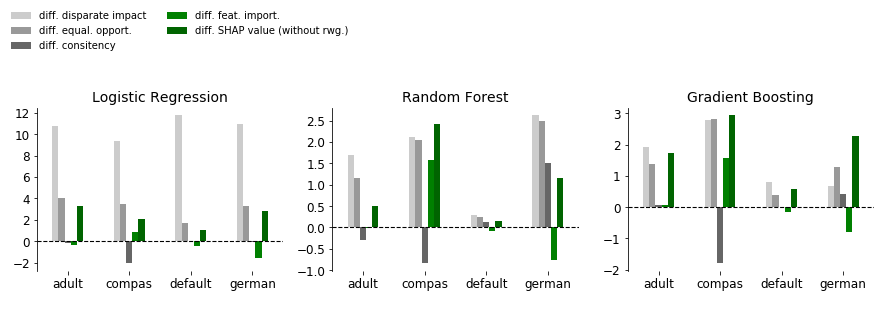

In [9]:
fig, axes = pl.subplots(nrows=1, ncols=3, figsize=(15, 3), sharex=True)
i = 0
cols_order = ['disp_impact_bin', 'equal_opport', 'consistency', 'feat_imp', 'mean_dif']
color_order = ['0.8','0.6','0.4', 'green', 'darkgreen']
model_order = ['lr', 'rf', 'gbm']
dataset_order = ['adult', 'compas', 'german', 'default']
model2title = {'lr': 'Logistic Regression',
               'rf': 'Random Forest', 
               'gbm': 'Gradient Boosting'}
             
for i, model_name in enumerate(model_order):
    res_model = res_variation[res_variation['model']==model_name]
    res_model = res_model.pivot_table(columns='index', values='variation', index='dataset')
    res_model = res_model[cols_order].copy()
    
    (res_model / res_model.std()).plot(kind='bar', ax=axes[i], fontsize=12,
                                       legend=False, color=color_order)
    
    axes[i].set_title(model2title[model_name], fontsize=14)
    axes[i].axhline(y=0, color='k', linestyle='--', linewidth=1.1, label='_nolegend_')
    axes[i].set_xlabel(' ')
    for tick in axes[i].get_xticklabels():
        tick.set_rotation(0)
    remove_axis(axes[i])

pl.legend(['diff. disparate impact', 'diff. equal. opport.',  
           'diff. consitency', 'diff. feat. import.', 
           'diff. SHAP value (without rwg.)'], 
          bbox_to_anchor=(-1.1,1.65), frameon=False, ncol=2)
# pl.savefig(path + 'res_final_comp.png',  bbox_inches='tight')

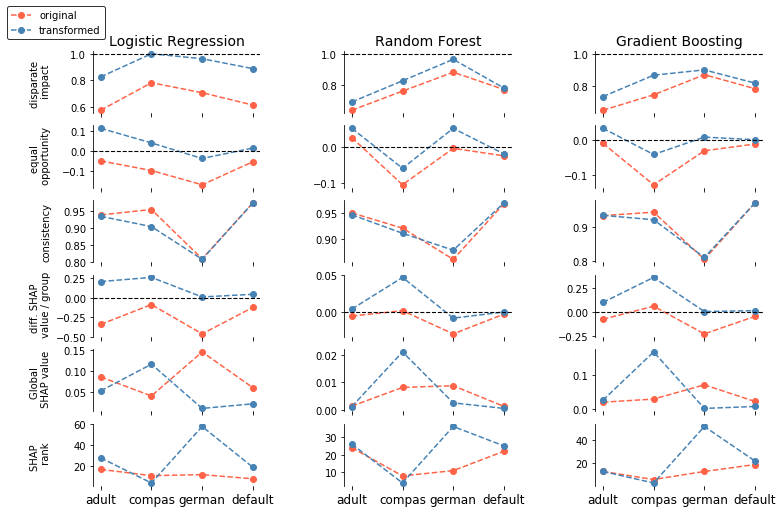

In [14]:
x = list(range(4))
my_xticks = ['adult', 'compas', 'german', 'default']

res_completo['dataset'] = pd.Categorical(res_completo['dataset'], my_xticks)
res_completo.sort_values(by='dataset', inplace=True)

df_orig_lr = res_completo[(res_completo['data'] == 'orig') & 
                          (res_completo['model'] == 'lr')]
df_transf_lr = res_completo[(res_completo['data'] == 'transf') & 
                            (res_completo['model'] == 'lr')]
df_orig_rf = res_completo[(res_completo['data'] == 'orig') & 
                          (res_completo['model'] == 'rf')]
df_transf_rf = res_completo[(res_completo['data'] == 'transf') & 
                            (res_completo['model'] == 'rf')]
df_orig_gbm = res_completo[(res_completo['data'] == 'orig') & 
                          (res_completo['model'] == 'gbm')]
df_transf_gbm = res_completo[(res_completo['data'] == 'transf') & 
                            (res_completo['model'] == 'gbm')]
name2title = {'acc_test': 'accuracy',
              'disp_impact_bin': 'disparate \n impact',              
              'equal_opport': 'equal \n opportunity',
              'entropy_index': 'gen. entropy index',
              'feat_imp': 'Global \n SHAP value',#'mean(|SHAP  \n value|)',
              'mean_dif': 'diff. SHAP \n value / group',
              'shap_rank': 'SHAP \n rank',
              'mean_difference': 'mean_difference',
             'false_discovery_rate': 'false_discovery_rate',
             'priv_greater_unpriv': 'privileged > \n unprivileged',
             'acc_test': 'acc_test',
             'consistency': 'consistency'}
fig, axes = pl.subplots(nrows=6, ncols=3, figsize=(12, 8), sharex=True)#, sharey=True)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

columns = ['disp_impact_bin', 'equal_opport', 'consistency', 'mean_dif', 'feat_imp', 'shap_rank']
for i, col in enumerate(columns):
    df_orig_lr.plot(x='new_name', y=col, color='tomato', style='--o', ax=axes[i,0], 
                 legend=False, grid=False)
    df_transf_lr.plot(x='new_name', y=col, color='steelblue', style='--o', ax=axes[i,0],
                   legend=False, grid=False)
    if col in ['mean_dif', 'equal_opport']:
        axes[i, 0].axhline(y=0, color='k', linestyle='--', linewidth=1.1)
    elif col == 'disp_impact_bin':
        axes[i, 0].axhline(y=1, color='k', linestyle='--', linewidth=1.1)
    axes[i,0].set_ylabel(name2title[col], fontsize=10)
    axes[i,0].yaxis.set_label_coords(-0.25, 0.5)
    axes[i,0].set_facecolor('xkcd:white')
    remove_axis(axes[i,0])
        
for i, col in enumerate(columns):
    df_orig_rf.plot(x='new_name', y=col, color='tomato', style='--o', ax=axes[i,1], 
                 legend=False, grid=False)
    df_transf_rf.plot(x='new_name', y=col, color='steelblue', style='--o', ax=axes[i,1],
                   legend=False, grid=False)
    if col in ['mean_dif', 'equal_opport']:
        axes[i, 1].axhline(y=0, color='k', linestyle='--', linewidth=1.1)
    elif col == 'disp_impact_bin':
        axes[i, 1].axhline(y=1, color='k', linestyle='--', linewidth=1.1)
    axes[i,1].set_facecolor('xkcd:white')
    remove_axis(axes[i,1])
    
for i, col in enumerate(columns):
    df_orig_gbm.plot(x='new_name', y=col, color='tomato', style='--o', ax=axes[i,2], 
                 legend=False, grid=False)
    df_transf_gbm.plot(x='new_name', y=col, color='steelblue', style='--o', ax=axes[i,2],
                   legend=False, grid=False)
    if col in ['mean_dif', 'equal_opport']:
        axes[i, 2].axhline(y=0, color='k', linestyle='--', linewidth=1.1)
    elif col == 'disp_impact_bin':
        axes[i, 2].axhline(y=1, color='k', linestyle='--', linewidth=1.1)
    axes[i,2].set_facecolor('xkcd:white')
    remove_axis(axes[i,2])

axes[0,0].set_title('Logistic Regression', fontsize=14)
axes[0,1].set_title('Random Forest', fontsize=14)
axes[0,2].set_title('Gradient Boosting', fontsize=14)
pl.xlabel(' ')
axes[5,0].set_xlabel(' ')
axes[5,1].set_xlabel(' ')
pl.xticks(x, my_xticks, fontsize=12)
legend = pl.legend(['original', 'transformed'], bbox_to_anchor=(-2.9,7.8))#, frameon=False)
legend.get_frame().set_edgecolor('k')
fig.patch.set_facecolor('w')
axes[5,0].tick_params(axis='x', which='major', labelsize=12)
axes[5,1].tick_params(axis='x', which='major', labelsize=12)

# pl.savefig(path+'res_final.png', bbox_inches='tight')

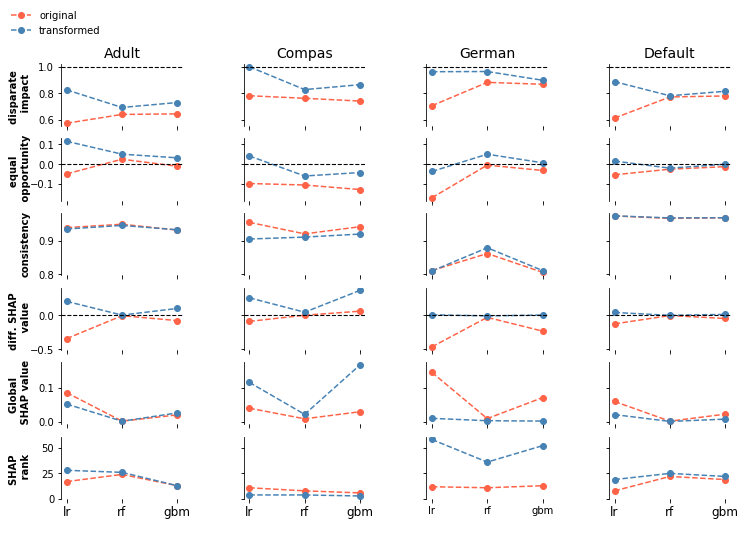

In [25]:
x = list(range(3))
my_xticks = ["lr", "rf", "gbm"]

res_completo['model'] = pd.Categorical(res_completo['model'], my_xticks)
res_completo.sort_values(by='model', inplace=True)

df_orig_adult = res_completo[(res_completo['data'] == 'orig') & 
                             (res_completo['dataset'] == 'adult')]
df_orig_compas = res_completo[(res_completo['data'] == 'orig') & 
                                (res_completo['dataset'] == 'compas')]
df_orig_german = res_completo[(res_completo['data'] == 'orig') & 
                              (res_completo['dataset'] == 'german')]
df_orig_default = res_completo[(res_completo['data'] == 'orig') & 
                               (res_completo['dataset'] == 'default')]

df_transf_adult = res_completo[(res_completo['data'] == 'transf') & 
                               (res_completo['dataset'] == 'adult')]
df_transf_compas = res_completo[(res_completo['data'] == 'transf') & 
                                (res_completo['dataset'] == 'compas')]
df_transf_german = res_completo[(res_completo['data'] == 'transf') & 
                                (res_completo['dataset'] == 'german')]
df_transf_default = res_completo[(res_completo['data'] == 'transf') & 
                                 (res_completo['dataset'] == 'default')]

name2title = {'acc_test': 'accuracy',
              'disp_impact_bin': 'disparate \n impact',              
              'equal_opport': 'equal \n opportunity',
              'entropy_index': 'gen. entropy index',
              'feat_imp': 'Global \n SHAP value',
              'mean_dif': 'diff. SHAP \n value',
              'shap_rank': 'SHAP \n rank',
              'mean_difference': 'mean_difference',
             'false_discovery_rate': 'false_discovery_rate',
             'priv_greater_unpriv': 'privileged > \n unprivileged',
             'acc_test': 'acc_test',
             'consistency': 'consistency'}
fig, axes = pl.subplots(nrows=6, ncols=4, figsize=(12, 8), sharex=True, sharey='row')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

columns = ['disp_impact_bin', 'equal_opport', 'consistency', 'mean_dif', 'feat_imp', 'shap_rank']
for i, col in enumerate(columns):
    df_orig_adult.plot(x='new_name', y=col, color='tomato', style='--o', ax=axes[i,0], 
                 legend=False, grid=False)
    df_transf_adult.plot(x='new_name', y=col, color='steelblue', style='--o', ax=axes[i,0],
                   legend=False, grid=False)
    if col in ['mean_dif', 'equal_opport']:
        axes[i, 0].axhline(y=0, color='k', linestyle='--', linewidth=1.1)
    elif col == 'disp_impact_bin':
        axes[i, 0].axhline(y=1, color='k', linestyle='--', linewidth=1.1)
    axes[i,0].set_ylabel(name2title[col], fontsize=10, fontweight='bold')
    axes[i,0].yaxis.set_label_coords(-0.25, 0.5)
    axes[i,0].set_facecolor('xkcd:white')
    remove_axis(axes[i,0])
        
for i, col in enumerate(columns):
    df_orig_compas.plot(x='new_name', y=col, color='tomato', style='--o', ax=axes[i,1], 
                 legend=False, grid=False)
    df_transf_compas.plot(x='new_name', y=col, color='steelblue', style='--o', ax=axes[i,1],
                   legend=False, grid=False)
    if col in ['mean_dif', 'equal_opport']:
        axes[i, 1].axhline(y=0, color='k', linestyle='--', linewidth=1.1)
    elif col == 'disp_impact_bin':
        axes[i, 1].axhline(y=1, color='k', linestyle='--', linewidth=1.1)
    axes[i,1].set_facecolor('xkcd:white')
    remove_axis(axes[i,1])
    
for i, col in enumerate(columns):
    df_orig_german.plot(x='new_name', y=col, color='tomato', style='--o', ax=axes[i,2], 
                 legend=False, grid=False)
    df_transf_german.plot(x='new_name', y=col, color='steelblue', style='--o', ax=axes[i,2],
                   legend=False, grid=False)
    if col in ['mean_dif', 'equal_opport']:
        axes[i, 2].axhline(y=0, color='k', linestyle='--', linewidth=1.1)
    elif col == 'disp_impact_bin':
        axes[i, 2].axhline(y=1, color='k', linestyle='--', linewidth=1.1)
    axes[i,2].set_facecolor('xkcd:white')
    remove_axis(axes[i,2])

for i, col in enumerate(columns):
    df_orig_default.plot(x='new_name', y=col, color='tomato', style='--o', ax=axes[i,3], 
                 legend=False, grid=False)
    df_transf_default.plot(x='new_name', y=col, color='steelblue', style='--o', ax=axes[i,3],
                   legend=False, grid=False)
    if col in ['mean_dif', 'equal_opport']:
        axes[i, 3].axhline(y=0, color='k', linestyle='--', linewidth=1.1)
    elif col == 'disp_impact_bin':
        axes[i, 3].axhline(y=1, color='k', linestyle='--', linewidth=1.1)
    axes[i,3].set_facecolor('xkcd:white')
    remove_axis(axes[i,3])
    
axes[0,0].set_title('Adult', fontsize=14)
axes[0,1].set_title('Compas', fontsize=14)
axes[0,2].set_title('German', fontsize=14)
axes[0,3].set_title('Default', fontsize=14)
pl.xlabel(' ')
axes[5,0].set_xlabel(' ')
axes[5,1].set_xlabel(' ')
axes[5,2].set_xlabel(' ')
pl.xticks(x, my_xticks, fontsize=12)
legend = pl.legend(['original', 'transformed'], bbox_to_anchor=(-4.1, 8), frameon=False)
legend.get_frame().set_edgecolor('k')
fig.patch.set_facecolor('w')
axes[5,0].tick_params(axis='x', which='major', labelsize=12)
axes[5,1].tick_params(axis='x', which='major', labelsize=12)

pl.savefig(path+'res_final_dataset.png', bbox_inches='tight')

In [26]:
def plot_marker(df_compl, x_name, y_name, fillstyle, ax, label):
    for name in df_compl.new_name.unique():
        df = df_compl[df_compl['new_name'] == name]
        x = df[x_name].values
        y = df[y_name].values
        marker = model2marker[df['model'].iloc[0]]
        color = dataset2color[df['dataset'].iloc[0]]
        if label:
            ax.plot(x, y, fillstyle=fillstyle, linestyle='none', markersize=10,
                    marker=marker, color=color, label=name)
        else:
            ax.plot(x, y, fillstyle=fillstyle, linestyle='none', markersize=10,
                    marker=marker, color=color)

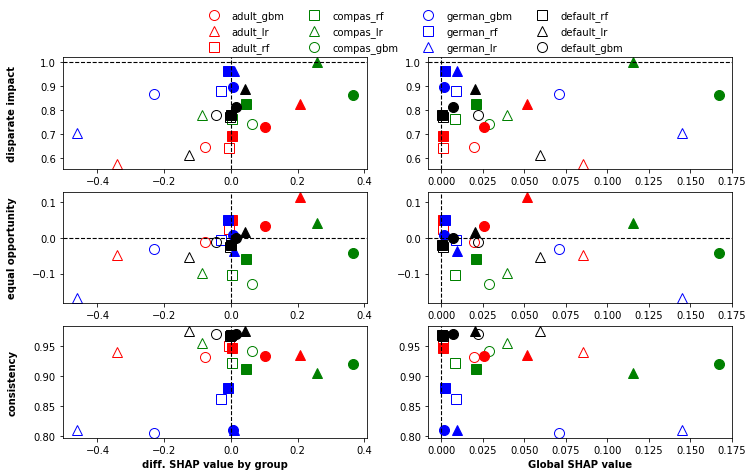

In [28]:
marker_style = dict(linestyle=':', color='cornflowerblue', markersize=10)
model2marker = {'lr': '^', 'rf': 's', 'gbm': 'o'}
dataset2color = {'adult': 'red', 'compas': 'green', 'german': 'blue', 'default': 'k'}

my_xticks = ['adult', 'compas', 'german', 'default']

res_completo['dataset'] = pd.Categorical(res_completo['dataset'], my_xticks)
res_completo.sort_values(by='dataset', inplace=True)

name2title = {'acc_test': 'accuracy',
              'disp_impact_bin': 'disparate impact',              
              'equal_opport': 'equal opportunity',
              'entropy_index': 'gen. entropy index',
              'feat_imp': 'Global SHAP value',
              'mean_dif': 'diff. SHAP value by group',
              'shap_rank': 'SHAP \n rank',
              'mean_difference': 'mean_difference',
             'false_discovery_rate': 'false_discovery_rate',
             'priv_greater_unpriv': 'privileged > \n unprivileged',
             'acc_test': 'acc_test',
             'consistency': 'consistency'}

fig, axes = pl.subplots(nrows=3, ncols=2, figsize=(12, 7))
order_axes = []
for i in range(2):
    for j in range(3):
        order_axes.append(axes[j, i])
        
fairness_meas = ['disp_impact_bin', 'equal_opport', 'consistency']
feat_import_meas = ['mean_dif', 'feat_imp']

for idx, (x_name, y_name) in enumerate(itertools.product(feat_import_meas, fairness_meas)):
    ax = order_axes[idx]

    res_completo_orig = res_completo[res_completo['data'] == 'orig']
    fillstyle = 'none'
    plot_marker(res_completo_orig, x_name, y_name, fillstyle, ax, True)

    res_completo_transf = res_completo[res_completo['data'] == 'transf']
    fillstyle = 'full'
    plot_marker(res_completo_transf, x_name, y_name, fillstyle, ax, False)
    if idx in [2, 5]: 
        ax.set_xlabel(name2title[x_name], fontsize=10, fontweight='bold')
    if idx < 3: 
        ax.set_ylabel(name2title[y_name], fontsize=10, fontweight='bold')
        ax.yaxis.set_label_coords(-0.15, 0.5)    
    if x_name == 'mean_dif':
        ax.axvline(x=0, color='k', linestyle='--', linewidth=1.1)
    elif x_name == 'feat_imp':
        ax.axvline(x=0, color='k', linestyle='--', linewidth=1.1)
        
    if y_name == 'equal_opport':
        ax.axhline(y=0, color='k', linestyle='--', linewidth=1.1)
    elif y_name == 'disp_impact_bin':
        ax.axhline(y=1, color='k', linestyle='--', linewidth=1.1)

pl.legend( bbox_to_anchor=(0.67,3.9), frameon=False, ncol=4)
pl.savefig(path+'res_final_scatter.png', bbox_inches='tight')